In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import uuid
from datetime import datetime
import os
%matplotlib inline
# Setting up visualization style
plt.style.use('seaborn-v0_8')


In [45]:
# Loading the dataset
def load_data():
    try:
        df = pd.read_csv('climate_action_data.csv')
        print("Dataset loaded successfully")
        return df
    except FileNotFoundError:
        print("Error: climate_action_data.csv not found")
        return None

In [46]:
# Inspecting the dataset
def inspect_data(df):
    print("\nDataset Info:")
    print(df.info())
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nUnique values per column:")
    print(df.nunique())

In [47]:
# Cleaning the dataset
def clean_data(df):
    # Converting 'error' to NaN
    df = df.replace('error', np.nan)
    
    # Converting numeric columns to appropriate types
    numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                    'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Converting Date to datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Removing duplicates based on Sensor_ID and Date
    df = df.drop_duplicates(subset=['Sensor_ID', 'Date'], keep='first')
    
    # Handling missing values
    # Filling numeric columns with median
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].median())
    
    # Filling categorical columns with mode
    df['Crop_Type'] = df['Crop_Type'].fillna(df['Crop_Type'].mode()[0])
    
    # Dropping rows with missing Date or Sensor_ID
    df = df.dropna(subset=['Date', 'Sensor_ID'])
    
    print(f"\nCleaned dataset shape: {df.shape}")
    print("\nMissing values after cleaning:")
    print(df.isnull().sum())
    
    return df

In [48]:
# Performing exploratory data analysis
def perform_eda(df):
    # Descriptive statistics
    print("\nDescriptive Statistics:")
    print(df.describe())
    
    # Creating histograms for numeric variables
    numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                    'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
    
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('numeric_distributions.png')
    plt.close()

In [ ]:
def perform_eda(df):
    try:
        # Check if DataFrame is empty or missing required columns
        required_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                        'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)', 'Crop_Type']
        if df.empty or not all(col in df.columns for col in required_cols):
            print(f"Error: DataFrame is empty or missing required columns. Found columns: {df.columns.tolist()}")
            return

        # Descriptive statistics
        print("\nDescriptive Statistics:")
        print(df.describe())
        
        # Creating histograms for numeric variables
        numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                        'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
        
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(numeric_cols, 1):
            plt.subplot(2, 3, i)
            sns.histplot(df[col], kde=True)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
        plt.tight_layout()
        plt.savefig('numeric_distributions.png')
        print(f"Saved histogram plot to '{os.path.abspath('numeric_distributions.png')}'")
        plt.show()  
        plt.close()
        
        # Creating correlation heatmap
        plt.figure(figsize=(10, 8))
        correlation_matrix = df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Heatmap of Soil and Environmental Variables')
        plt.savefig('correlation_heatmap.png')
        print(f"Saved correlation heatmap to '{os.path.abspath('correlation_heatmap.png')}'")
        plt.show()  
        plt.close()
        
        # Identifying variables influencing fertilizer recommendations
        fertilizer_correlations = correlation_matrix['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
        print("\nCorrelations with Fertilizer_Recommended:")
        print(fertilizer_correlations)
        
        # Finding crop with highest average soil moisture
        crop_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
        print("\nAverage Soil Moisture by Crop Type:")
        print(crop_moisture)
        
        # Analyzing irrigation needs for high temperatures
        high_temp_crops = df[df['Temperature(C)'] > 30]
        irrigation_by_crop = high_temp_crops.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()
        print("\nAverage Irrigation Recommended for Crops with Temperature > 30°C:")
        print(irrigation_by_crop)
        
    except Exception as e:
        print(f"Error in perform_eda: {str(e)}")
 

In [50]:
# Exporting cleaned dataset
def export_cleaned_data(df):
    df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
    print("\nCleaned dataset exported as 'cleaned_precision_agriculture_data.csv'")

Dataset loaded successfully

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB
None

First 5 rows:
  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  

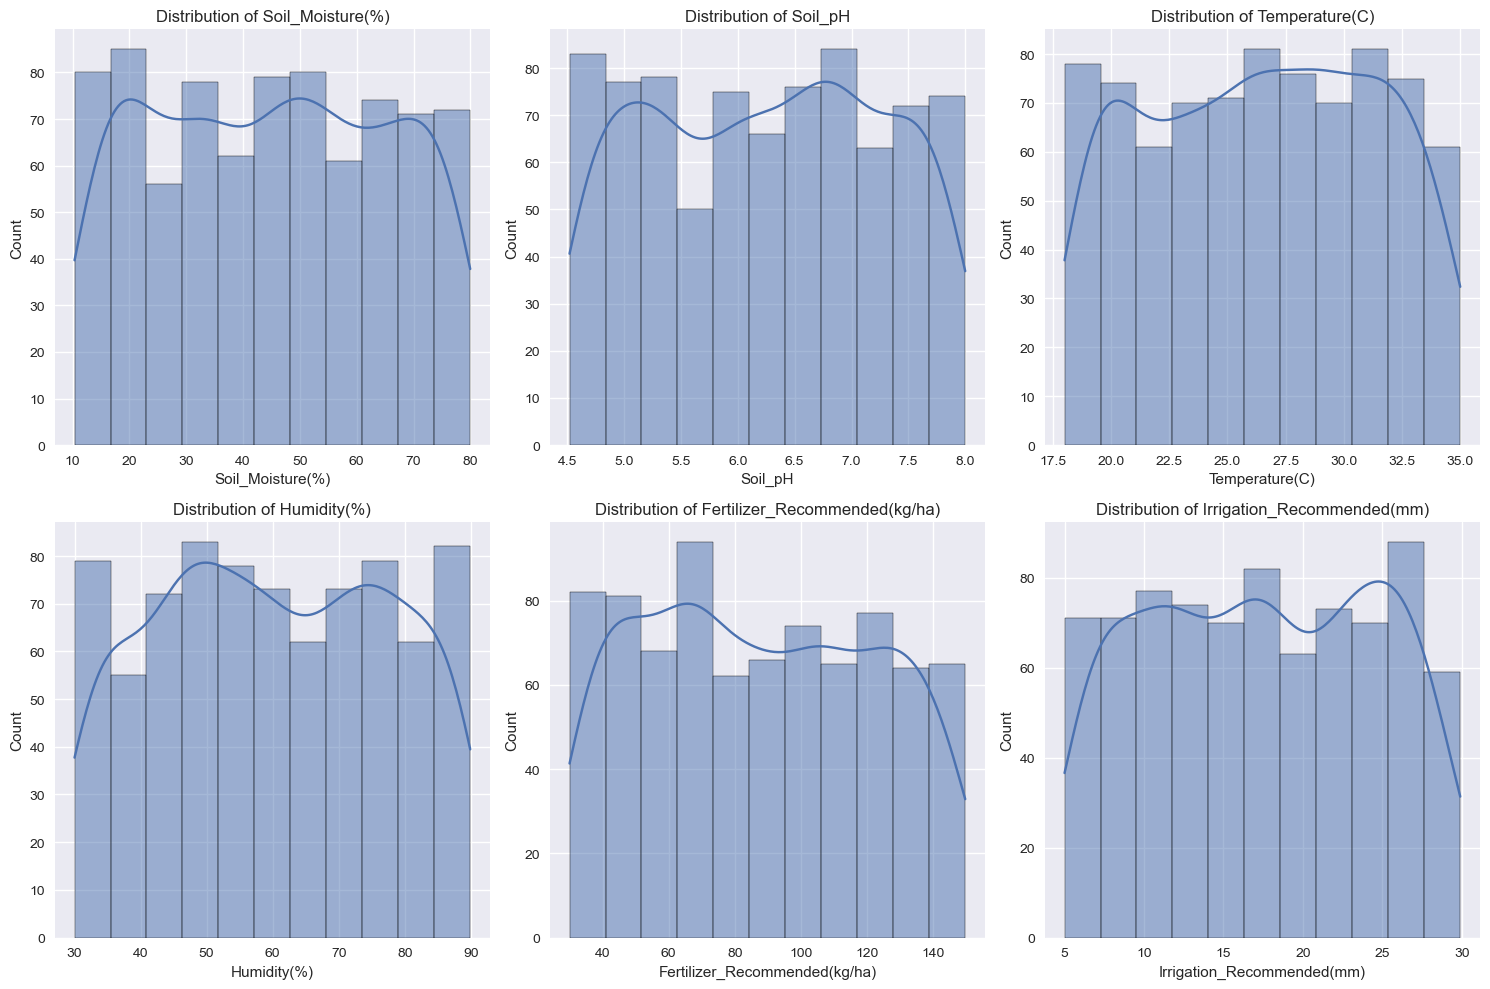

Saved correlation heatmap to 'c:\Users\HP\Desktop\Assignments\correlation_heatmap.png'


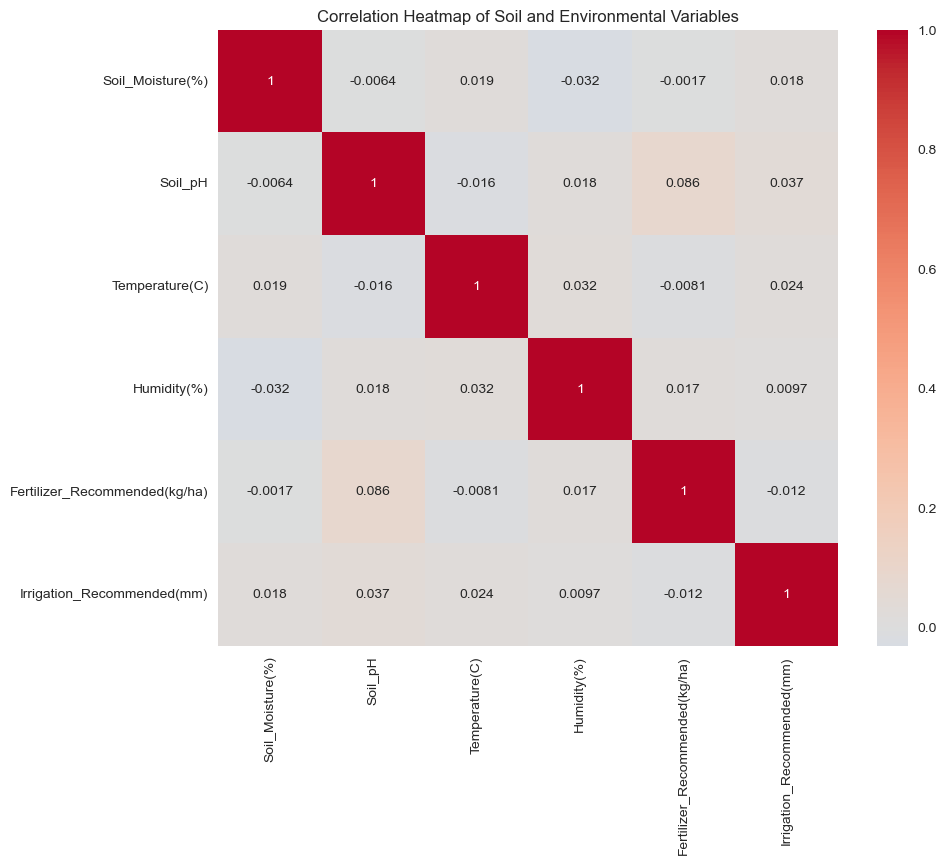


Correlations with Fertilizer_Recommended:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.085576
Humidity(%)                      0.017063
Soil_Moisture(%)                -0.001727
Temperature(C)                  -0.008142
Irrigation_Recommended(mm)      -0.012448
Name: Fertilizer_Recommended(kg/ha), dtype: float64

Average Soil Moisture by Crop Type:
Crop_Type
Wheat       47.357727
Maize       44.955032
Beans       44.339272
Tomatoes    44.186747
Lettuce     42.933600
Name: Soil_Moisture(%), dtype: float64

Average Irrigation Recommended for Crops with Temperature > 30°C:
Crop_Type
Beans       17.857692
Lettuce     16.297297
Maize       16.625455
Tomatoes    18.919565
Wheat       18.645946
Name: Irrigation_Recommended(mm), dtype: float64

Cleaned dataset exported as 'cleaned_precision_agriculture_data.csv'

Insights and Recommendations:
1. Data Quality: The dataset had issues with 'error' entries, missing values, and duplicates which were addressed.
2. Fe

In [51]:
def export_cleaned_data(df):
    df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
    print("\nCleaned dataset exported as 'cleaned_precision_agriculture_data.csv'")

def main():
    # Loading data
    df = load_data()
    if df is None:
        return
    
    # Inspecting initial dataset
    inspect_data(df)
    
    # Cleaning data
    df_cleaned = clean_data(df)
    
    # Performing EDA
    perform_eda(df_cleaned)
    
    # Exporting cleaned data
    export_cleaned_data(df_cleaned)
    
    # Documenting insights
    print("\nInsights and Recommendations:")
    print("1. Data Quality: The dataset had issues with 'error' entries, missing values, and duplicates which were addressed.")
    print("2. Fertilizer Influence: Based on correlations, soil moisture and temperature appear to have the strongest relationships with fertilizer recommendations.")
    print("3. Soil Moisture: Wheat tends to have the highest average soil moisture, suggesting it may require less frequent irrigation.")
    print("4. Irrigation for High Temperatures: Crops experiencing temperatures above 30°C (especially Maize and Tomatoes) require higher irrigation levels.")
    print("5. Recommendations: Adjust irrigation schedules for Maize and Tomatoes in high-temperature conditions, and optimize fertilizer application based on soil moisture levels.")

if __name__ == "__main__":
    main()